# MOVIES RATING PREDICTION

In [5]:
# import python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df=pd.read_csv("IMDb Movies India.csv",encoding='ISO-8859-1')
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [39]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [40]:
df.shape

(15509, 10)

In [43]:
pd.isnull(df).sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [44]:
# delete null values
df.dropna(inplace=True)

In [45]:
df.shape

(5659, 10)

In [46]:
pd.isnull(df).sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [51]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [50]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [54]:
#removing the paranthesis 
df['Year'] = df['Year'].str.replace('(','').str.replace(')','')

In [58]:
df['Year'].head(10)

1     2019
3     2019
5     1997
6     2005
8     2012
9     2014
10    2004
11    2016
12    1991
13    2012
Name: Year, dtype: object

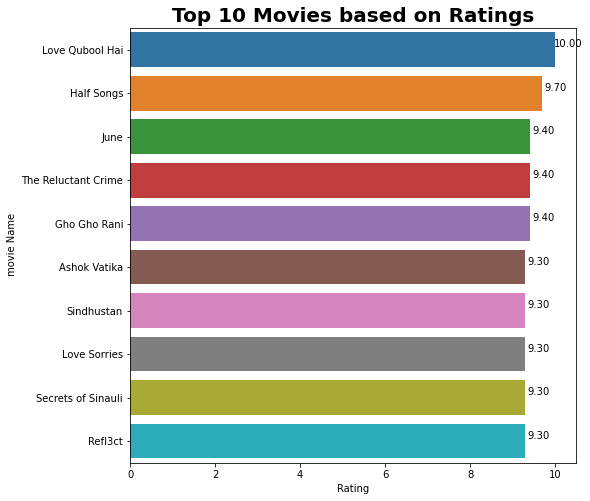

In [70]:
#intializing figure of the chart
plt.figure(figsize=(8, 8))

#sorting Name and Rating by Rating then selecting top 10
top_movies= df[['Name','Rating']].sort_values(by='Rating',ascending=False).head(10)

#Plotting Bar chart
plots = sns.barplot(x="Rating", y="Name", data=top_movies)
  

#Plotting Labels for bars
for bar in plots.patches:
    
    plots.annotate(format(bar.get_width(),'.2f'), 
                   (bar.get_x() + bar.get_width()+0.2, 
                    bar.get_y()+0.5), ha='center', va='center',
                   size=10, xytext=(5,10),
                   textcoords='offset points')

    
plt.xlabel("Rating")
plt.ylabel(" movie Name")
plt.title("Top 10 Movies based on Ratings",fontsize=20,fontweight='bold')
plt.show()

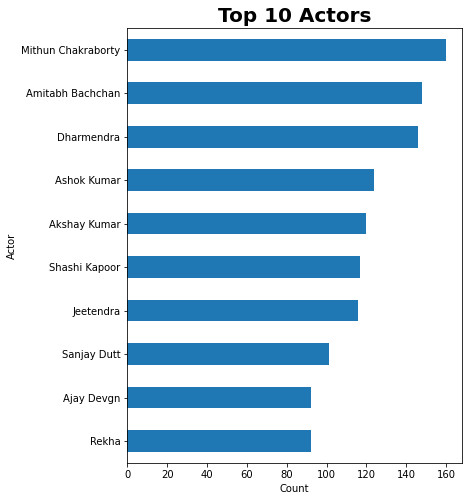

In [79]:
#Making Series for the all the columns of Actors
Actor1=df['Actor 1']
Actor2=df['Actor 2']
Actor3=df['Actor 3']

#Concatinating the series in one series
Actors = pd.concat([Actor1,Actor2,Actor3])

#sorting series by counts then selecting top 10
frequent_actor=Actors.value_counts().sort_values(ascending=False).head(10)

#Plotting Bar graph
frequent_actor.sort_values().plot(kind='barh',figsize=(6,8))   
plt.title('Top 10 Actors',fontweight='bold',fontsize=20)
plt.xlabel('Count')
plt.ylabel('Actor')

plt.show()

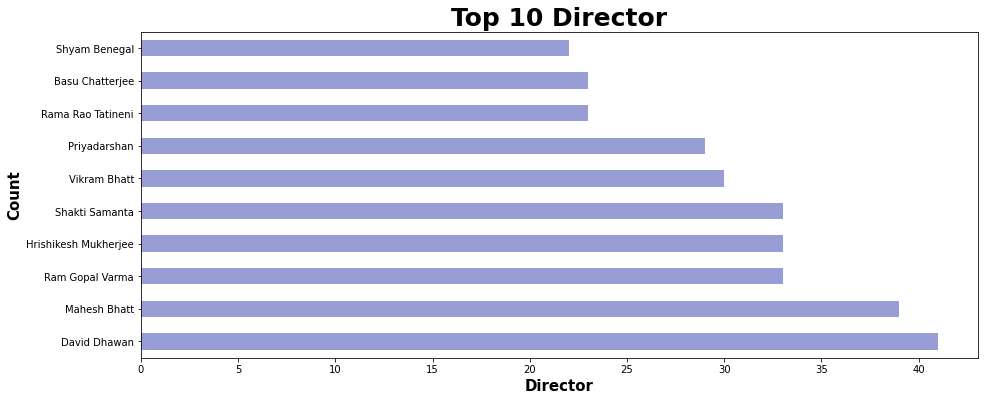

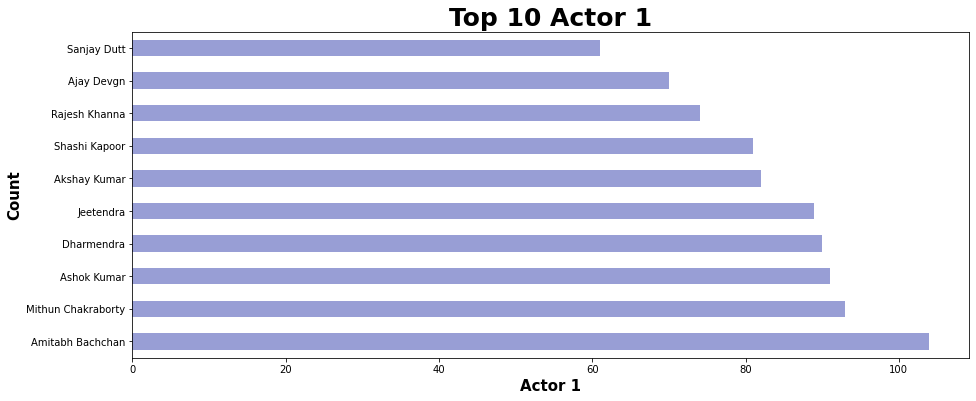

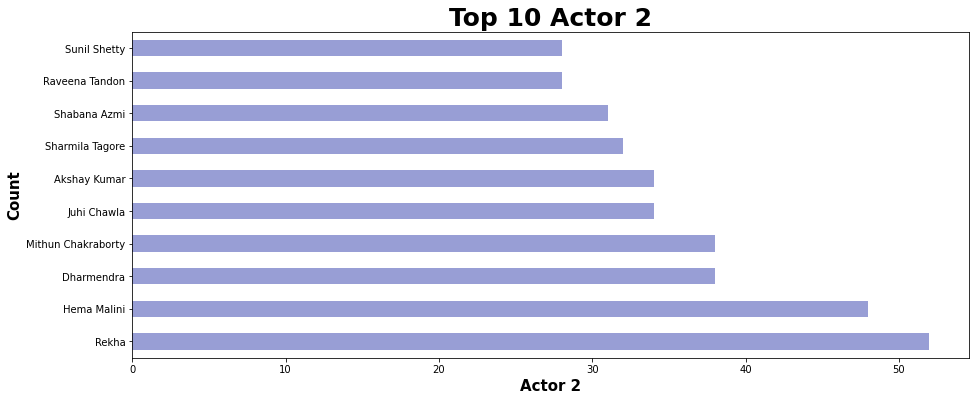

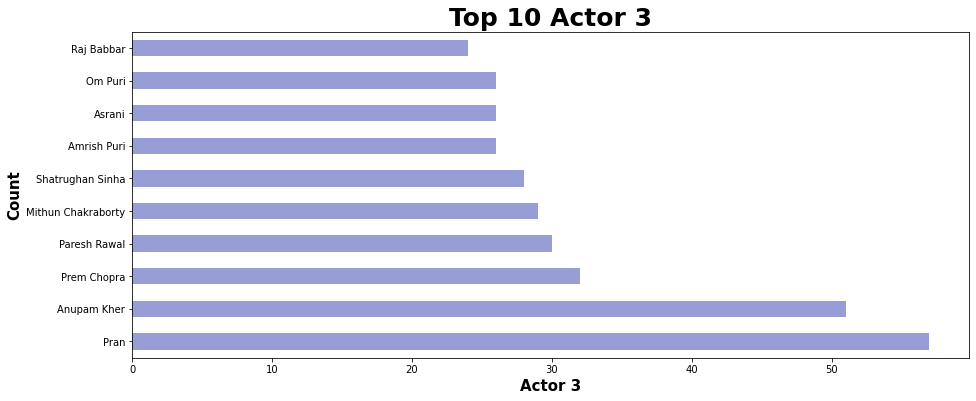

In [90]:
#Creating a Funtion for plotting graphs 
def top10(column):
    global dframe
    dframe[column].value_counts().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(15,6),color='#989ED5')
    
    plt.xlabel(column,fontsize=15,fontweight='bold')
    plt.ylabel('Count',fontweight='bold',fontsize=15)
    plt.title("Top 10 {}".format(column),fontsize=25,fontweight='bold')
    
    plt.show()
#Looping the columns then calling the funtion to plot graph
cols=['Director','Actor 1','Actor 2','Actor 3']
for items in cols:
    top10(items)